In [52]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [53]:
# ruff :noqa: E402

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Background

# Dataset

In [54]:
sns.set_style("whitegrid")
%matplotlib inline


def set_seed(seed: int = 31415) -> None:
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)


set_seed()

In [55]:
df = pd.read_csv("data/AB_US_2023.csv")

/tmp/ipykernel_31144/3866743118.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/AB_US_2023.csv")


In [56]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232147 entries, 0 to 232146
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              232147 non-null  int64  
 1   name                            232131 non-null  object 
 2   host_id                         232147 non-null  int64  
 3   host_name                       232134 non-null  object 
 4   neighbourhood_group             96500 non-null   object 
 5   neighbourhood                   232147 non-null  object 
 6   latitude                        232147 non-null  float64
 7   longitude                       232147 non-null  float64
 8   room_type                       232147 non-null  object 
 9   price                           232147 non-null  int64  
 10  minimum_nights                  232147 non-null  int64  
 11  number_of_reviews               232147 non-null  int64  
 12  last_review     

In [58]:
df.describe(include="all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
count,2.321470e+05,232131,2.321470e+05,232134,96500,232147,232147.000000,232147.000000,232147,232147.000000,232147.000000,232147.000000,183062,183062.000000,232147.000000,232147.000000,232147.000000,232147
unique,NaN,220164,NaN,29368,30,1412,NaN,NaN,4,NaN,NaN,NaN,3147,NaN,NaN,NaN,NaN,27
top,NaN,Presidential Suite In A Mansion,NaN,Blueground,City of Los Angeles,Unincorporated Areas,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2023-03-05,NaN,NaN,NaN,NaN,New York City
freq,NaN,150,NaN,4305,22204,11882,NaN,NaN,169142,NaN,NaN,NaN,5008,NaN,NaN,NaN,NaN,42931
mean,2.584580e+17,NaN,1.582248e+08,NaN,NaN,NaN,36.610585,-98.301436,NaN,259.468001,13.495867,40.915230,NaN,1.638348,29.879055,180.985686,11.689701,NaN
std,3.465985e+17,NaN,1.587164e+08,NaN,NaN,NaN,5.126523,19.706929,NaN,1024.645918,27.920631,80.649152,NaN,1.910812,106.013665,134.715299,20.599954,NaN
min,6.000000e+00,NaN,2.300000e+01,NaN,NaN,NaN,25.957323,-123.089130,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.638896e+07,NaN,2.299242e+07,NaN,NaN,NaN,33.976225,-118.315111,NaN,91.000000,2.000000,1.000000,NaN,0.310000,1.000000,52.000000,0.000000,NaN
50%,4.896307e+07,NaN,1.005783e+08,NaN,NaN,NaN,36.190556,-97.727670,NaN,149.000000,3.000000,9.000000,NaN,1.000000,2.000000,175.000000,3.000000,NaN
75%,6.633014e+17,NaN,2.686930e+08,NaN,NaN,NaN,40.717440,-77.026222,NaN,250.000000,30.000000,43.000000,NaN,2.420000,10.000000,321.000000,16.000000,NaN


In [59]:
df.shape

(232147, 18)

In [60]:
df_vis = df.drop(columns=["name", "id", "host_name", "host_id"])
# drop rows with missing price or price == 0
df_vis = df_vis.dropna(subset=["price"])
df_vis = df_vis[df_vis["price"] > 0]


In [61]:
df["room_type"].value_counts()

room_type
Entire home/apt    169142
Private room        59759
Shared room          2276
Hotel room            970
Name: count, dtype: int64

<Axes: >

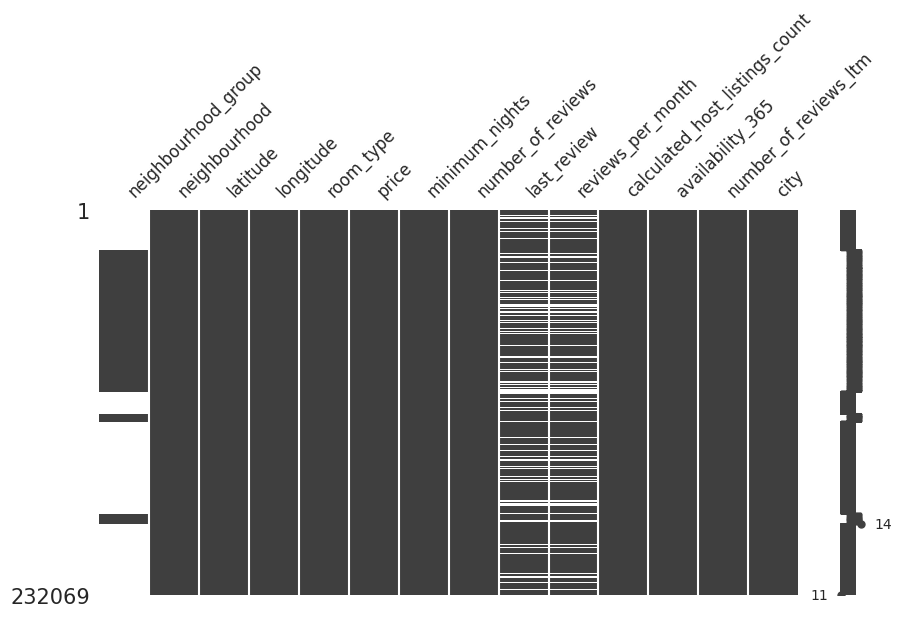

In [62]:
import missingno as msno

msno.matrix(df_vis, figsize=(10, 5), fontsize=12)

In [63]:
df_vis["room_type"] = df_vis["room_type"].map(
    {"Private room": 0, "Entire home/apt": 1, "Shared room": 2, "Hotel room": 3}
)


In [64]:
# plot scatter plot between all pairs of variables
# sns.pairplot(df_vis, diag_kind="kde")


In [65]:
df_vis["room_type"].value_counts()

room_type
1    169142
0     59758
2      2276
3       893
Name: count, dtype: int64

<Axes: xlabel='room_type'>

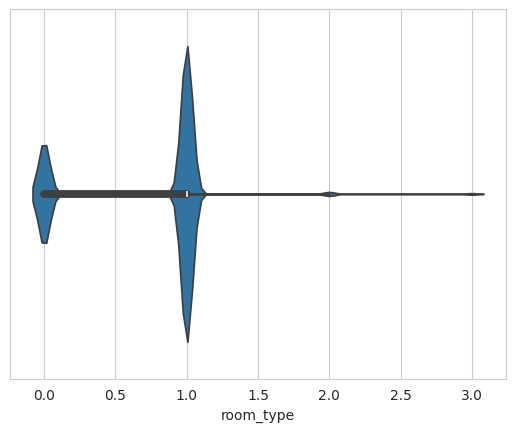

In [66]:
sns.violinplot(x="room_type", data=df_vis)

<Axes: xlabel='number_of_reviews', ylabel='price'>

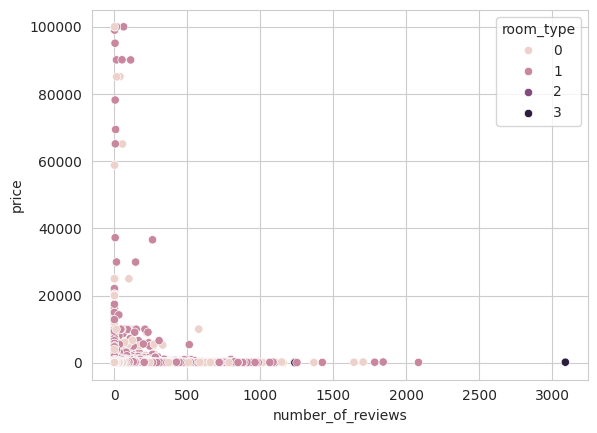

In [67]:
sns.scatterplot(x="number_of_reviews", y="price", data=df_vis, hue="room_type")

<Axes: xlabel='price', ylabel='Count'>

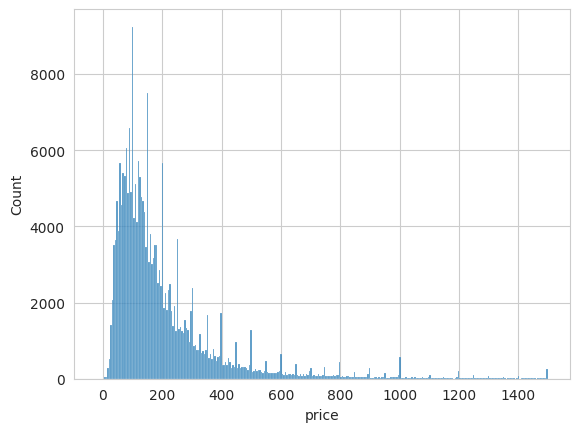

In [68]:
sns.histplot(df_vis["price"], legend=True, label="price", binrange=(-20, 1500), cbar=True)

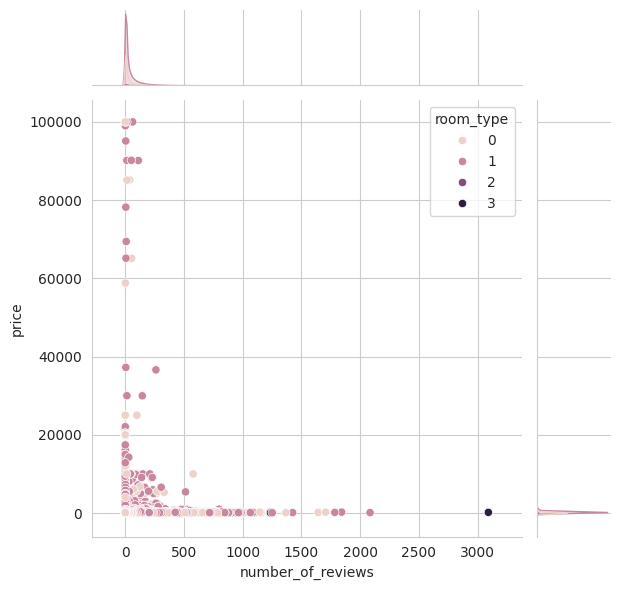

In [69]:
sns.jointplot(x="number_of_reviews", y="price", data=df_vis, hue="room_type")

### violinplot

<Axes: xlabel='room_type'>

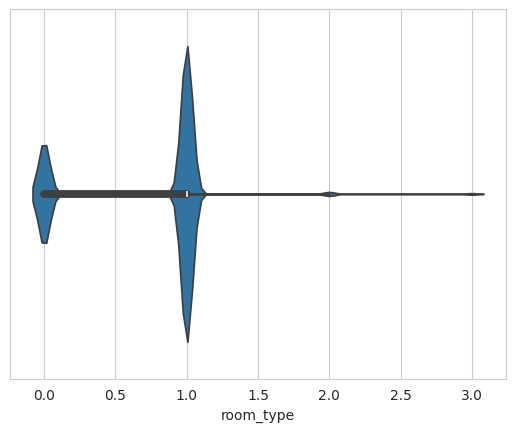

In [70]:
sns.violinplot(x="room_type",data=df_vis)

<Axes: xlabel='price'>

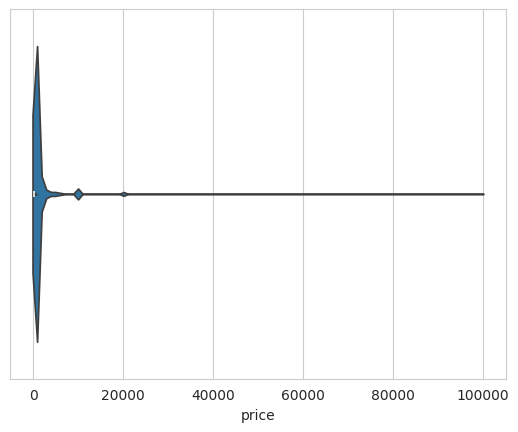

In [71]:
sns.violinplot(x="price",data=df_vis)

<Axes: ylabel='minimum_nights'>

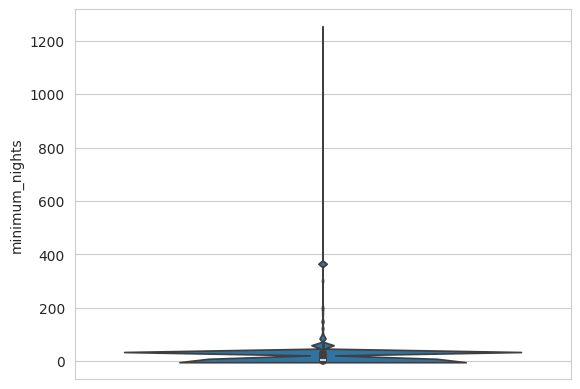

In [72]:
sns.violinplot(df_vis["minimum_nights"])

# Objective/Goal


# Methodology

## Data Cleaning/Preprocessing

In [73]:
df.shape

(232147, 18)

In [74]:
# check if there are any duplicates except for the id column
df.duplicated(subset=df.columns.difference(["id"])).sum()

382

In [75]:
# remove duplicates
df = df.drop_duplicates(subset=df.columns.difference(["id"]))

In [76]:
df.shape

(231765, 18)

In [77]:
## remove unnecessary columns
unnecessary_columns = [
    "host_name",
    "host_id",
    "id"
]

df = df.drop(columns=unnecessary_columns)



In [78]:
df.shape

(231765, 15)

In [79]:
# remove columns with more than 50% missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values / df.shape[0]
missing_values = missing_values[missing_values > 0.5]
missing_values


neighbourhood_group    0.583686
dtype: float64

In [80]:
# remove columns with more than 50% missing values
df = df.drop(columns=missing_values.index)


In [81]:
df.shape

(231765, 14)

<Axes: >

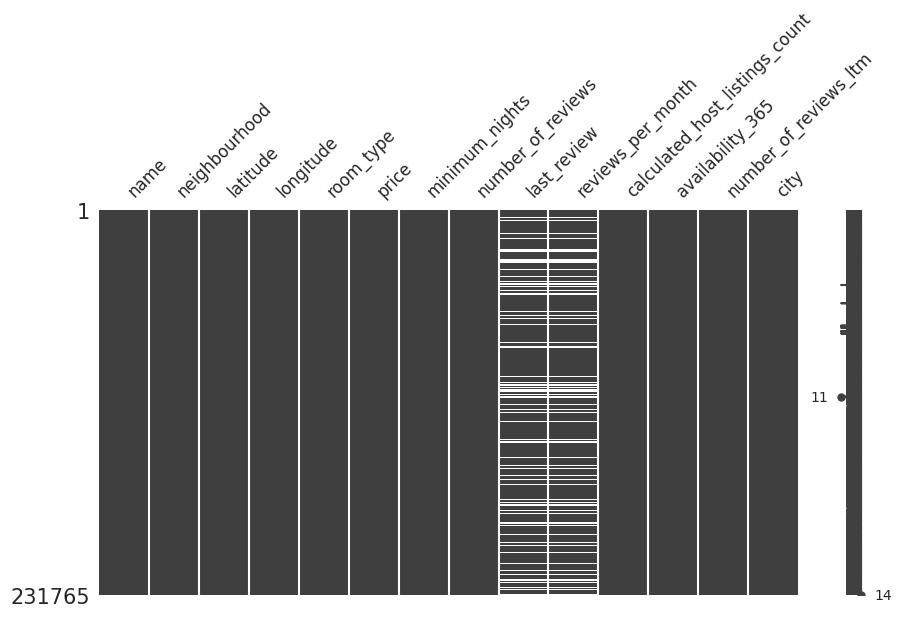

In [82]:
import missingno as msno

msno.matrix(df, figsize=(10, 5), fontsize=12)

#### Data Type Conversion

In [83]:
df.dtypes

name                               object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
city                               object
dtype: object

In [84]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [103]:
# columns with positive values
positive_columns = [
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
]

for column in positive_columns:
    if any(df[column] < 0):
        print(f"Column {column} has negative values")

### Outlier Removal

#### Price

<Axes: xlabel='price'>

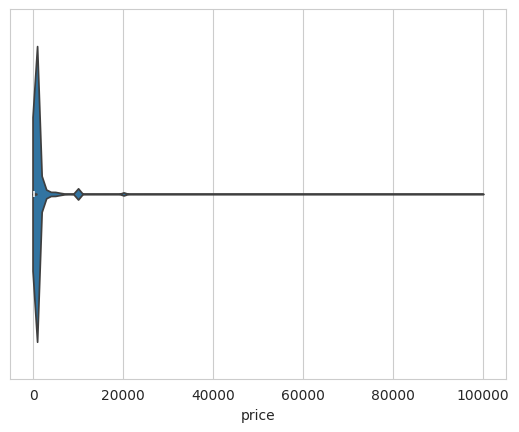

In [86]:
# remove outliers for price
# boxplot
sns.violinplot(x="price", data=df)

In [87]:
df["price"].describe()

count    231765.000000
mean        257.580273
std        1008.769831
min           0.000000
25%          90.000000
50%         149.000000
75%         250.000000
max      100000.000000
Name: price, dtype: float64

In [88]:
# use interquartile range to remove outliers
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
print(q1, q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

# remove outliers
df = df[(df["price"] > lower_bound) & (df["price"] < upper_bound)]


90.0 250.0
160.0
-150.0 490.0


<Axes: xlabel='price'>

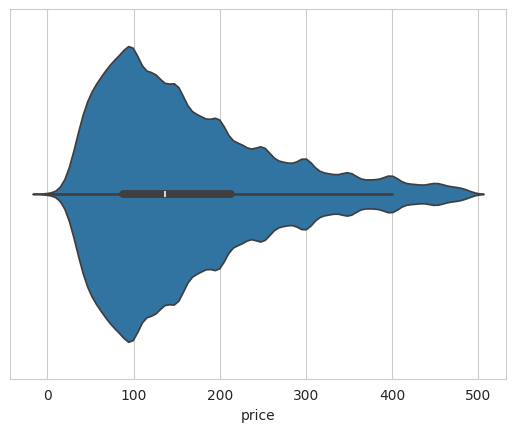

In [89]:
# boxplot
sns.violinplot(x=df["price"])

#### Number of Reviews


In [90]:
df["number_of_reviews"].describe()

count    212458.000000
mean         42.884043
std          83.081155
min           0.000000
25%           1.000000
50%           9.000000
75%          45.000000
max        3091.000000
Name: number_of_reviews, dtype: float64

In [91]:
df["number_of_reviews"].value_counts()

number_of_reviews
0      41974
1      16937
2      11031
3       8135
4       6518
       ...  
628        1
860        1
728        1
792        1
964        1
Name: count, Length: 860, dtype: int64

<Axes: xlabel='number_of_reviews'>

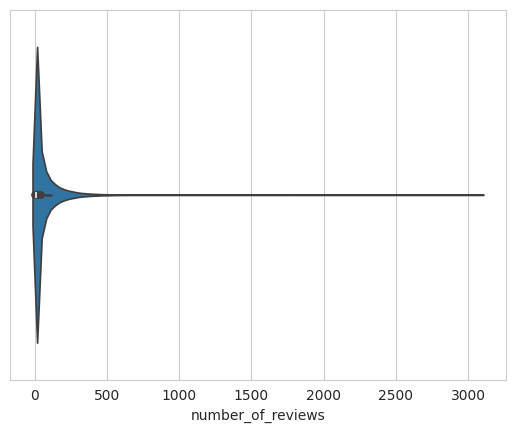

In [92]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])

In [93]:
# use interquartile range to remove outliers
q1 = df["number_of_reviews"].quantile(0.25)
q3 = df["number_of_reviews"].quantile(0.75)
print(q1, q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

# remove outliers
df = df[(df["number_of_reviews"] > lower_bound) & (df["number_of_reviews"] < upper_bound)]


1.0 45.0
44.0
-65.0 111.0


<Axes: xlabel='number_of_reviews'>

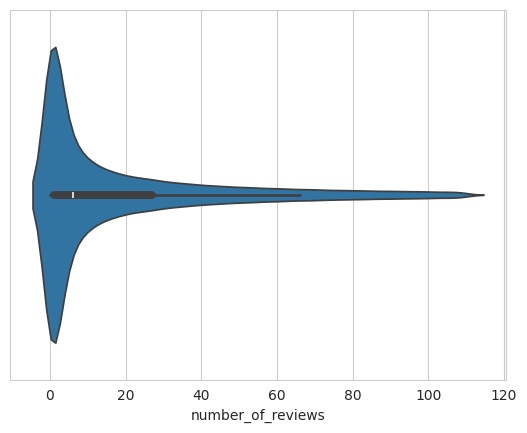

In [94]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])


In [95]:
df["number_of_reviews"].describe()

count    187632.000000
mean         18.714212
std          25.899917
min           0.000000
25%           1.000000
50%           6.000000
75%          27.000000
max         110.000000
Name: number_of_reviews, dtype: float64

#### Minimum Nights

In [96]:
df["number_of_reviews"].value_counts()

number_of_reviews
0      41974
1      16937
2      11031
3       8135
4       6518
       ...  
103      253
109      250
110      250
102      244
104      240
Name: count, Length: 111, dtype: int64

In [97]:
df["number_of_reviews"].describe()

count    187632.000000
mean         18.714212
std          25.899917
min           0.000000
25%           1.000000
50%           6.000000
75%          27.000000
max         110.000000
Name: number_of_reviews, dtype: float64

<Axes: xlabel='number_of_reviews'>

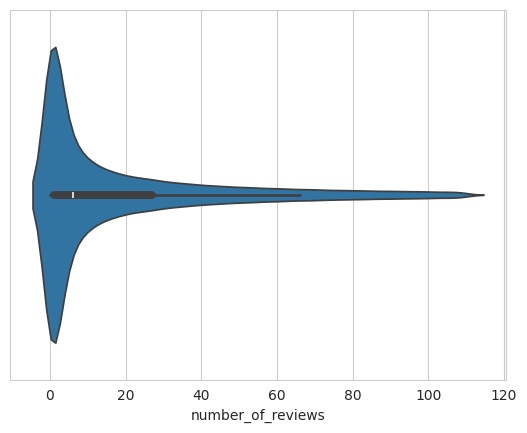

In [98]:
sns.violinplot(x=df["number_of_reviews"])

In [99]:
# use interquartile range to remove outliers
q1 = df["number_of_reviews"].quantile(0.25)
q3 = df["number_of_reviews"].quantile(0.75)
print(q1, q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

# remove outliers
df = df[(df["number_of_reviews"] > lower_bound) & (df["number_of_reviews"] < upper_bound)]


1.0 27.0
26.0
-38.0 66.0


<Axes: xlabel='number_of_reviews'>

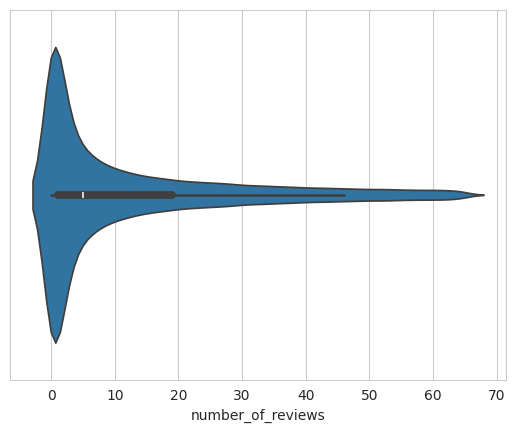

In [100]:
# violinplot
sns.violinplot(x=df["number_of_reviews"])


In [101]:
df["number_of_reviews"].describe()

count    171745.000000
mean         12.554601
std          16.414563
min           0.000000
25%           1.000000
50%           5.000000
75%          19.000000
max          65.000000
Name: number_of_reviews, dtype: float64

In [102]:
df["number_of_reviews"].value_counts()

number_of_reviews
0     41974
1     16937
2     11031
3      8135
4      6518
      ...  
61      566
59      546
63      510
65      498
64      479
Name: count, Length: 66, dtype: int64

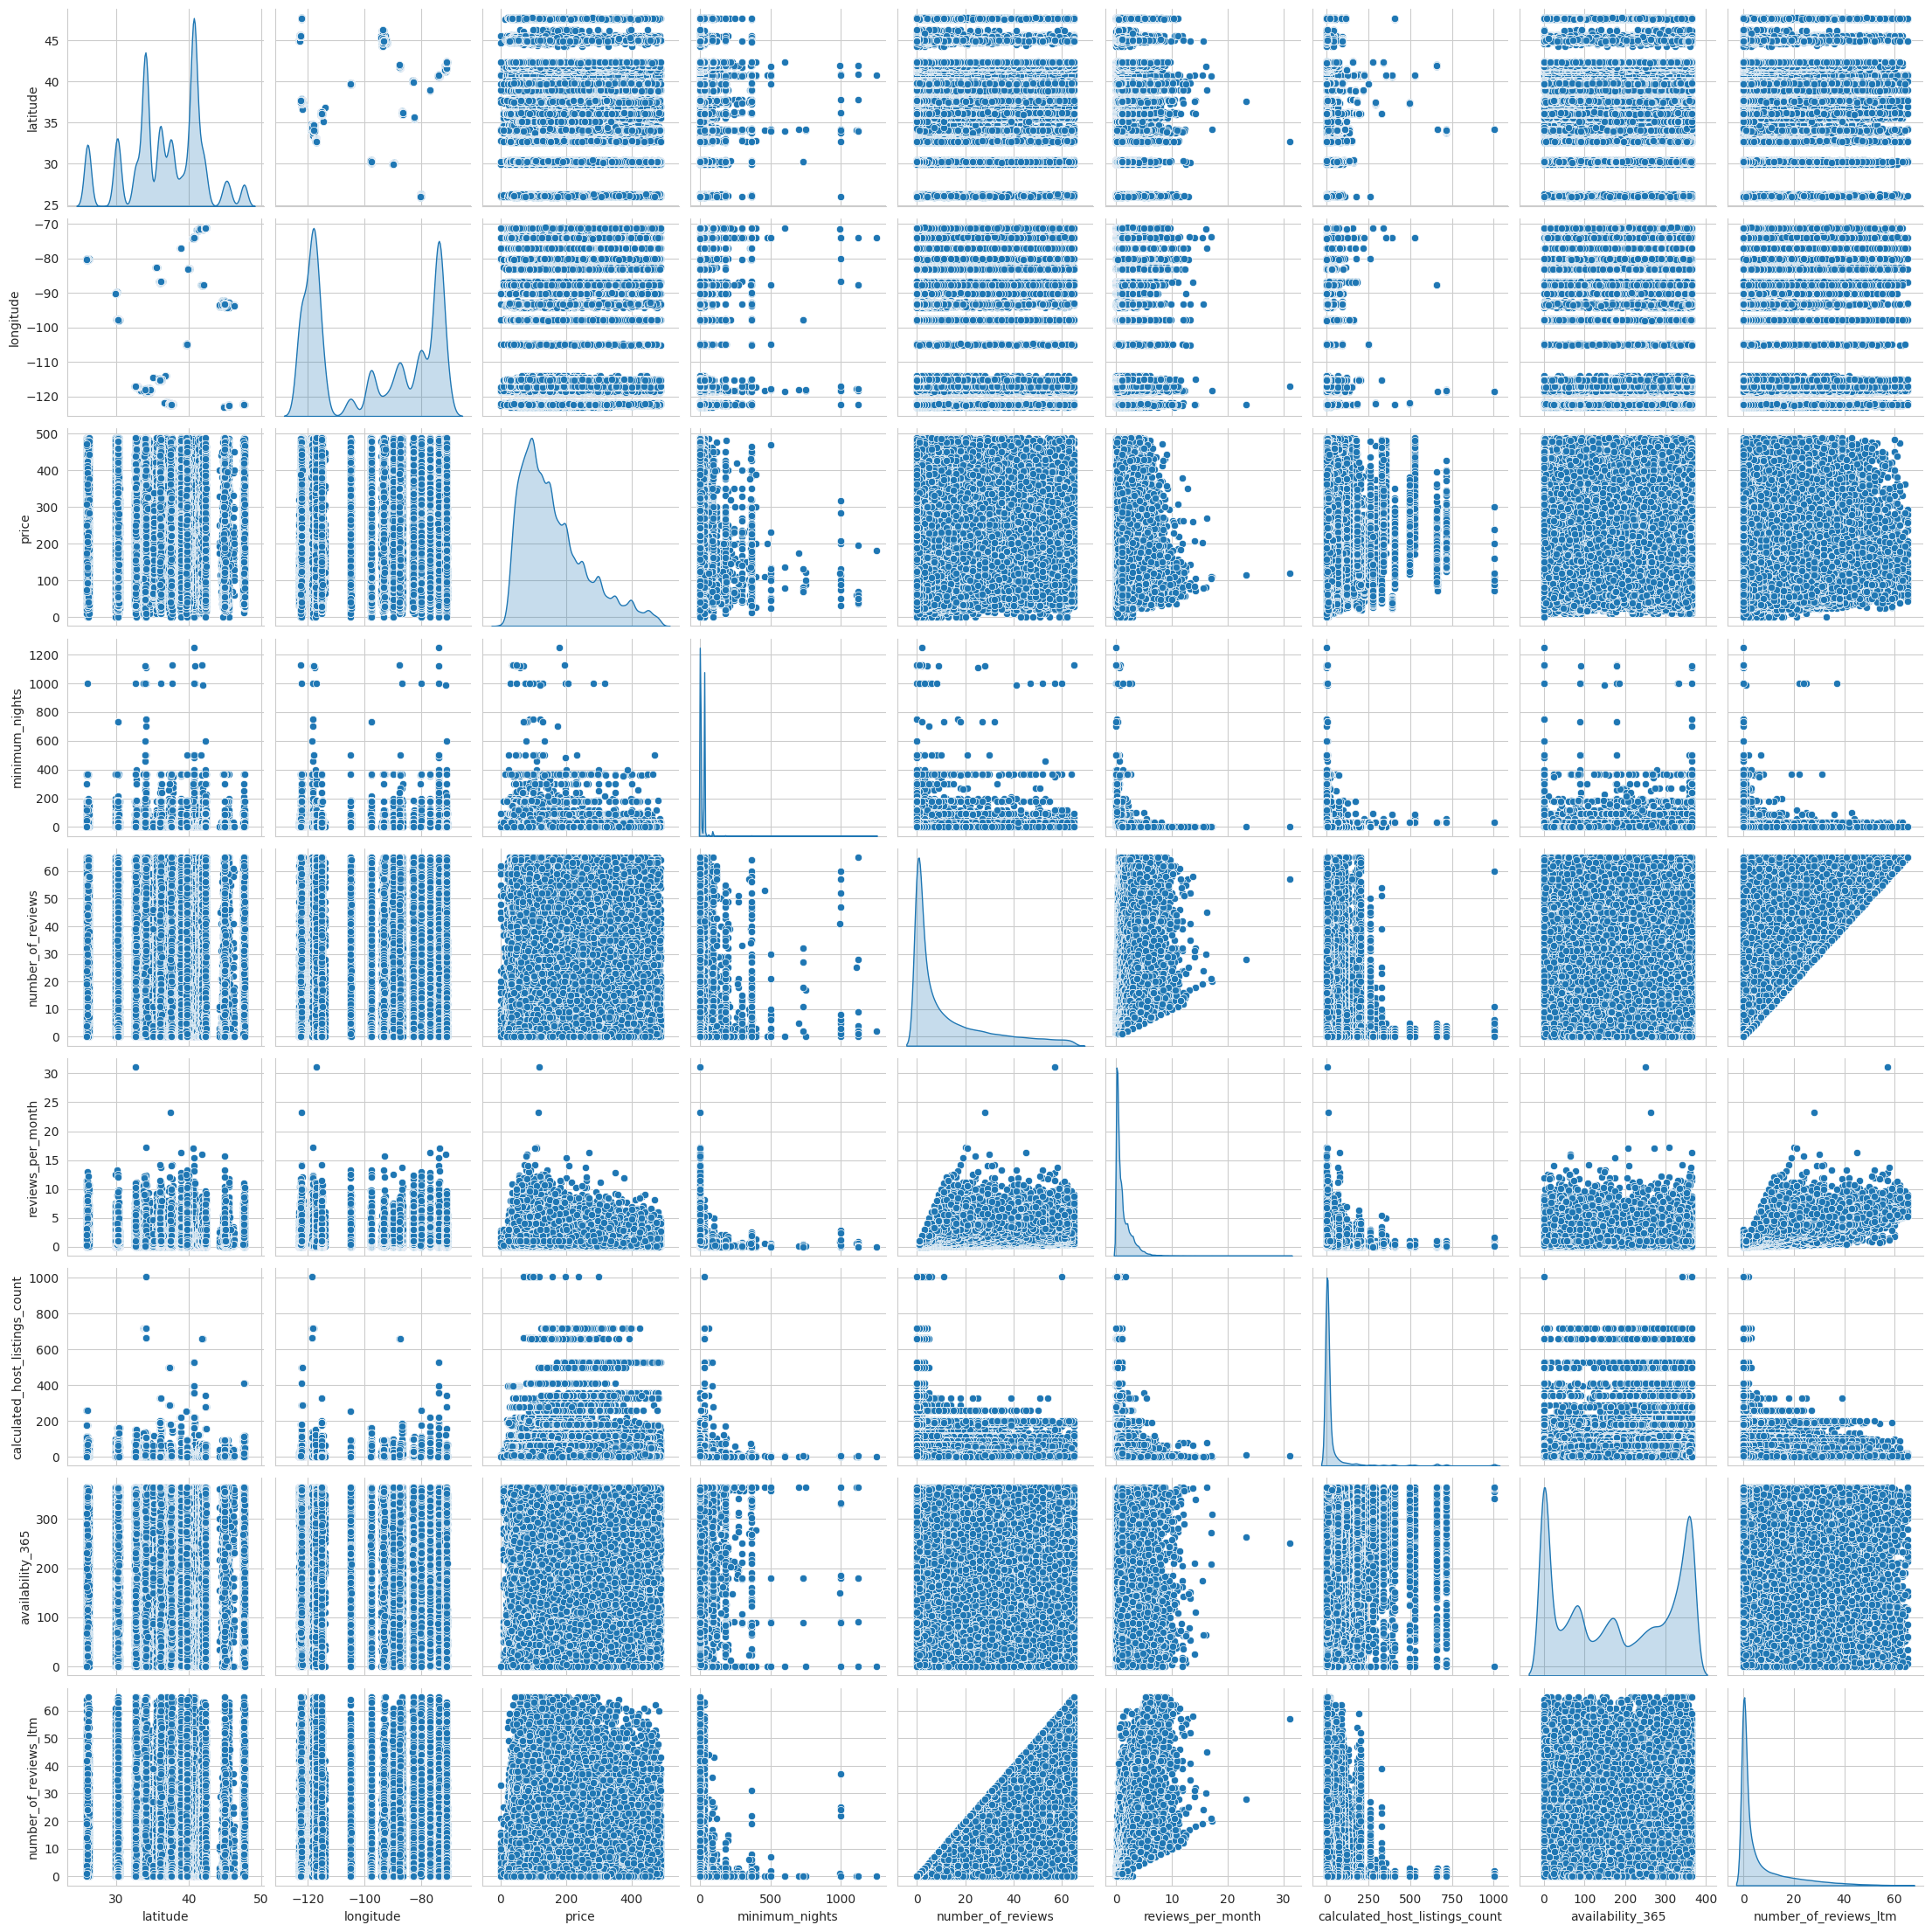

In [104]:
sns.pairplot(df, diag_kind="kde")

In [105]:
# missing values
df.isnull().sum()


name                                 16
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       41974
reviews_per_month                 41974
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
city                                  0
dtype: int64

In [119]:
# get number of reviews for rows with missing reviews_per_month and last_review
df[df["reviews_per_month"].isnull()]["number_of_reviews"].value_counts()

number_of_reviews
0    41974
Name: count, dtype: int64

We can see that the reason why reviews_per_month or last_review is null is because the host has never received a review. Therefore, we can replace the null values with 0 or the mode in the case of last_review.

In [120]:
df["reviews_per_month"].fillna(0, inplace=True)

In [121]:
# last_review fillna with mode
df["last_review"].fillna(df["last_review"].mode()[0], inplace=True)

In [122]:
df.isnull().sum()

name                              16
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
city                               0
dtype: int64

In [123]:
# fill missing values for name column with "No name"
df["name"].fillna("No name", inplace=True)

In [124]:
df.isnull().sum()

name                              0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
city                              0
dtype: int64

<Axes: >

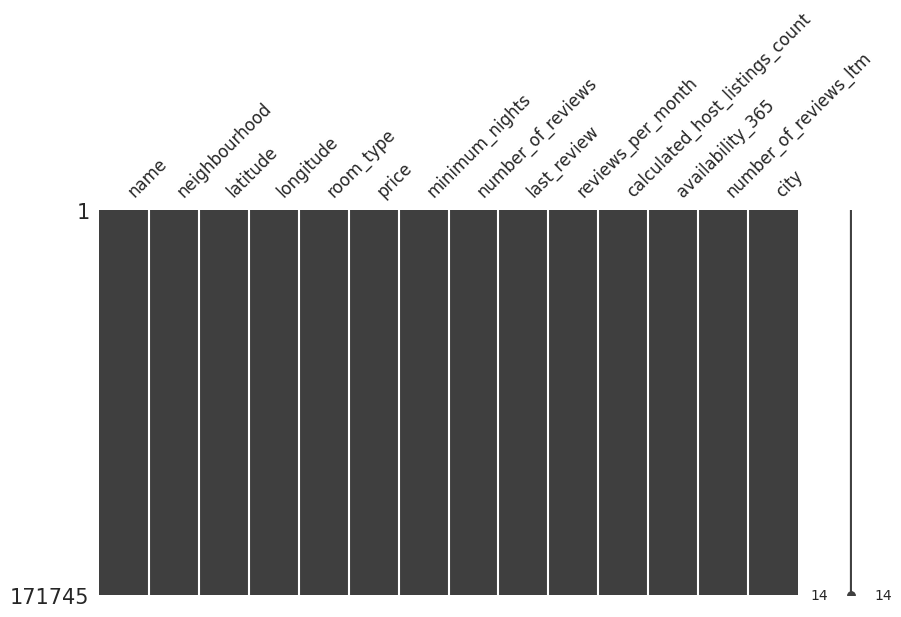

In [125]:
msno.matrix(df, figsize=(10, 5), fontsize=12)